In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
dataPate =pd.read_excel(open('analysistest.xlsx', 'rb'), sheet_name='PATE') 
dataPate.columns =[column.replace(" ", "_") for column in dataPate.columns]
dataPate.head(1)

,Exp_No,optimizer,dataset,Mode,no_of_Teachers,lap_noise,max_steps_teachers,max_steps_student,No_of_Queries,epsilon,teachers_accuracy,aggregated_labels'_Accuracy,student_accuracy,Mean_Accuracy
0,1,GradientDescentOptimizer,MNIST,no of Teachers,10,10,3000,500,100,3.2391,0.9717,0.2454,0.3036,0.5069


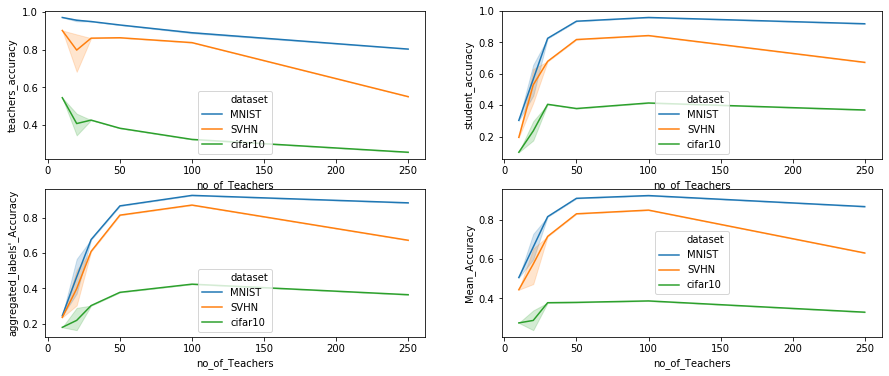

In [10]:
## teachers to Accuracy plots
fig, axs = plt.subplots(ncols=2,nrows=2, figsize=(15, 6))
sns.lineplot(x="no_of_Teachers", y="teachers_accuracy", hue="dataset",  data=dataPate,ax=axs[0][0])
sns.lineplot(x="no_of_Teachers", y="student_accuracy", hue="dataset",  data=dataPate,ax=axs[0][1])
sns.lineplot(x="no_of_Teachers", y="aggregated_labels'_Accuracy", hue="dataset",  data=dataPate,ax=axs[1][0])
sns.lineplot(x="no_of_Teachers", y="Mean_Accuracy", hue="dataset",  data=dataPate,ax=axs[1][1])


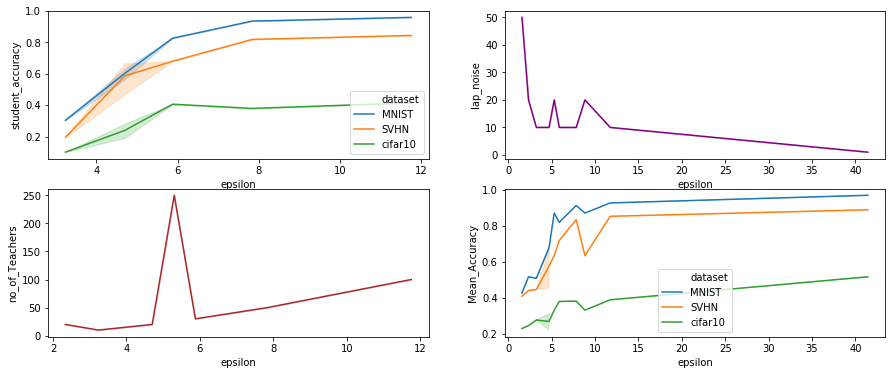

In [13]:
##epsilon plot
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(15, 6))
dataPate1= dataPate.query('lap_noise == 10')
dataPate2= dataPate.query('lap_noise == 10 or lap_noise == 20 and No_of_Queries ==100')
sns.lineplot("epsilon", "student_accuracy",  data=dataPate1,  hue="dataset", ax=axs[0][0],  palette=["C0", "C1","C2"]);
sns.lineplot( "epsilon","lap_noise",  data=dataPate,  ax=axs[0][1],  color="purple");
sns.lineplot( "epsilon","no_of_Teachers",  data=dataPate2,  ax=axs[1][0],   color="brown");
sns.lineplot( "epsilon","Mean_Accuracy",  data=dataPate,hue="dataset",  ax=axs[1][1],   palette=["C0", "C1","C2"]);

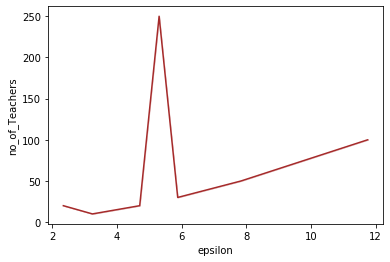

In [14]:
sns.lineplot( "epsilon","no_of_Teachers",  data=dataPate2,   color="brown");

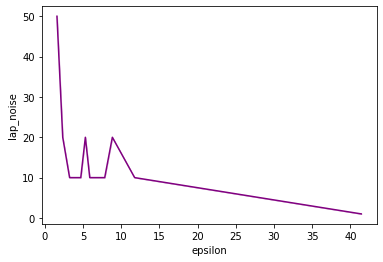

In [15]:
sns.lineplot( "epsilon","lap_noise",  data=dataPate,  color="purple");

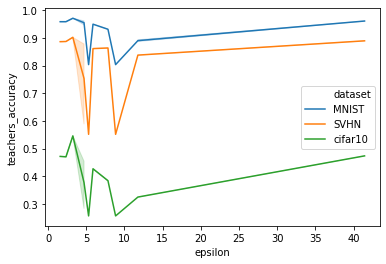

In [25]:

sns.lineplot(x="epsilon", y="teachers_accuracy", hue="dataset",  data=dataPate)

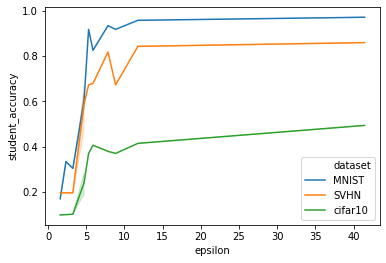

In [26]:

sns.lineplot(x="epsilon", y="student_accuracy", hue="dataset",  data=dataPate)

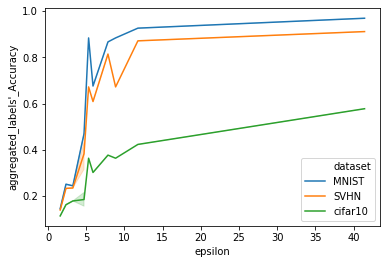

In [27]:

sns.lineplot(x="epsilon", y="aggregated_labels'_Accuracy", hue="dataset",  data=dataPate)

In [ ]:
#data1 = data[(data.mode == "Default") & (data.mode == "L2_norm_clip")]
#data1 = data.query('mode != "Default" and mode != "L2_norm_clip" and mode != "LearningRate"')
g = sns.FacetGrid(data=dataPate, col="lap_noise",hue="dataset",col_wrap=3, height=4)
g.map(sns.lineplot,"epsilon","student_accuracy")
g.add_legend()